In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:

# https://www.dataquest.io/mission/74/getting-started-with-kaggle/
# Getting Started With Kaggle
BES = pd.read_stata("../BES_analysis_data/BES2015_W8_v1.3.dta")
# print(BES.describe())

In [3]:
BES3 = pd.read_stata("../BES_analysis_data/BES2015_W3_Panel_v1.2.dta")
# print(BES3.describe())

In [4]:
euRefcols = [s for s in list(BES3.columns) if "gross" in s]
euRefcols

['profile_gross_household', 'profile_gross_personal']

In [5]:
BES3[euRefcols].count()



# profile_gross_household    36525
# profile_gross_personal     36533
# not many missing values (household 18, perasonal 10)
# profile_gross_personal: codes 14 and 15 are "Prefer not to answer" and "Don't know" 
# profile_gross_household: codes 15 and 16 are "Prefer not to anwer" and "Don't know"
# household 7280, 2535
# personal  6986, 1517
# -> use personal
# How to divide up?

profile_gross_household    36525
profile_gross_personal     36533
dtype: int64

In [6]:
BES3[euRefcols]

,profile_gross_household,profile_gross_personal
0,Don't know,"£10,000 to £14,999 per year"
1,Don't know,Don't know
2,"£30,000 to £34,999 per year","£20,000 to £24,999 per year"
3,"£50,000 to £59,999 per year","£5,000 to £9,999 per year"
4,"£20,000 to £24,999 per year","£15,000 to £19,999 per year"
5,"£35,000 to £39,999 per year","£5,000 to £9,999 per year"
6,"£35,000 to £39,999 per year","£35,000 to £39,999 per year"
7,"£30,000 to £34,999 per year","£30,000 to £34,999 per year"
8,"£15,000 to £19,999 per year","£5,000 to £9,999 per year"
9,Prefer not to answer,"£20,000 to £24,999 per year"


0.00     0.0
0.33     2.0
0.66     5.0
1.00    13.0
Name: profile_gross_personal, dtype: float64


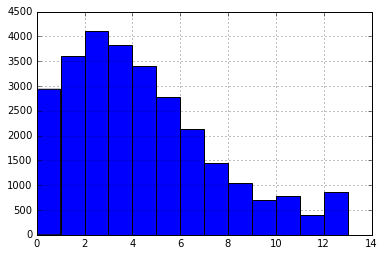

In [7]:
#BES3[euRefcols].apply(lambda x: x.cat.codes)
income = BES3[euRefcols].apply(lambda x: x.cat.codes).profile_gross_personal
income[(income>=0 )& (income <14)].hist(bins=range(0,14))

# N= 28030

print( income[(income>=0 )& (income <14)].quantile([0, .33, .66, 1]) )
#print( income[(income>=0 )& (income <14)].quantile(.5) )
#print( income[(income>=0 )& (income <14)].quantile(.75) )

In [8]:
# Missing value = -1
# Stay in the EU = 0
# Leave the EU = 1
# Would not vote = 2
# Don't know = 3

euRefVote = BES3.euRefVoteW3.cat.codes
euRefVote[euRefVote==-1] = np.nan
euRefVote[euRefVote==2] = np.nan
euRefVote[euRefVote==3] = np.nan
euRefVote
# including missing value in a series transforms it to floats from ints

0        1.0
1        0.0
2        0.0
3        1.0
4        1.0
5        NaN
6        0.0
7        1.0
8        1.0
9        0.0
10       0.0
11       0.0
12       0.0
13       1.0
14       0.0
15       1.0
16       1.0
17       0.0
18       0.0
19       NaN
20       0.0
21       NaN
22       0.0
23       1.0
24       1.0
25       NaN
26       NaN
27       0.0
28       1.0
29       0.0
        ... 
36513    NaN
36514    NaN
36515    0.0
36516    0.0
36517    1.0
36518    0.0
36519    1.0
36520    NaN
36521    NaN
36522    NaN
36523    NaN
36524    0.0
36525    1.0
36526    NaN
36527    NaN
36528    NaN
36529    NaN
36530    1.0
36531    1.0
36532    1.0
36533    NaN
36534    NaN
36535    1.0
36536    0.0
36537    1.0
36538    1.0
36539    0.0
36540    0.0
36541    1.0
36542    NaN
dtype: float64

In [9]:
death_penalty = BES3.al2.cat.codes
#                  ['Strongly disagree', 'Disagree', 'Neither agree nor disagree', 'Agree', 'Strongly agree', 'Don't know']
# -1 missing value, 0,                    1,          2,                            3,      4,                 5, 
death_penalty[death_penalty==-1] = np.nan
death_penalty[death_penalty==5] = np.nan
death_penalty

0        2.0
1        1.0
2        1.0
3        2.0
4        2.0
5        0.0
6        2.0
7        3.0
8        3.0
9        0.0
10       0.0
11       0.0
12       2.0
13       3.0
14       3.0
15       4.0
16       4.0
17       0.0
18       0.0
19       2.0
20       1.0
21       2.0
22       1.0
23       2.0
24       NaN
25       0.0
26       4.0
27       0.0
28       3.0
29       0.0
        ... 
36513    1.0
36514    0.0
36515    1.0
36516    3.0
36517    4.0
36518    0.0
36519    3.0
36520    3.0
36521    4.0
36522    0.0
36523    0.0
36524    0.0
36525    4.0
36526    3.0
36527    2.0
36528    4.0
36529    0.0
36530    3.0
36531    1.0
36532    3.0
36533    2.0
36534    3.0
36535    4.0
36536    0.0
36537    3.0
36538    4.0
36539    3.0
36540    1.0
36541    4.0
36542    4.0
dtype: float64

In [10]:
np.correlate(euRefVote,death_penalty)

array([ nan])

In [11]:
euRefVote.corr(death_penalty)

0.47621066203915768

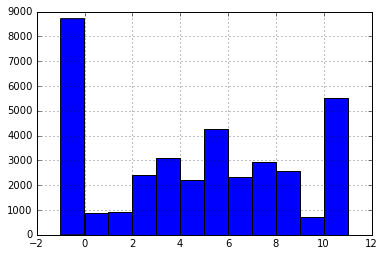

In [12]:
BES3.leftRightW3.cat.codes.hist(bins=12)

In [13]:
leftRight = BES3.leftRightW3.cat.codes
leftRight[leftRight == -1] = np.nan
leftRight[leftRight == 11] = np.nan

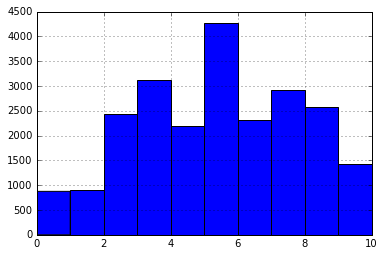

In [14]:
leftRight.hist()

In [15]:
euRefVote.corr(leftRight)

0.43201660014281051

In [16]:
sum(pd.isnull(BES3.eesEUIntegrationSelfW3))/len(BES3.eesEUIntegrationSelfW3)

0.61740962701474977

In [17]:
BES3.eesEUIntegrationSelfW3.cat.categories

Index(['Unification has already gone too far', '1', '2', '3', '4', '5', '6',
       '7', '8', '9', 'Unification should be pushed further', 'Don't know'],
      dtype='object')

In [18]:
EUIntegration = BES3.eesEUIntegrationSelfW3.cat.codes
EUIntegration[EUIntegration==-1] = np.nan
EUIntegration[EUIntegration==11] = np.nan


In [19]:
euRefVote.corr(EUIntegration)

-0.6934850632862114

In [20]:
sum(euRefVote[death_penalty==0]==1)/sum(~euRefVote[death_penalty==0].isnull())

0.1344199088678584

In [21]:
sum(euRefVote[death_penalty==0]==1)/sum(~euRefVote[death_penalty==0].isnull())

0.1344199088678584

In [22]:
dp_by_eu = pd.DataFrame(data=pd.concat([euRefVote,death_penalty],axis=1),copy=True  )   #,columns=["euRefVote","death_penalty"])
dp_by_eu.columns =["euRefVote","death_penalty"]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000047D3BA8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000AFEC748>]], dtype=object)

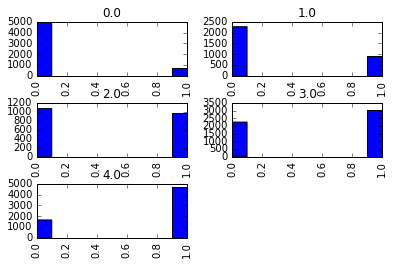

In [23]:
dp_by_eu.hist(column="euRefVote",by="death_penalty")

In [24]:
dp_by_eu.groupby(['death_penalty'])["euRefVote"].mean()

death_penalty
0.0    0.134420
1.0    0.286700
2.0    0.477306
3.0    0.576778
4.0    0.741603
Name: euRefVote, dtype: float64

In [25]:
# Whites only
# income

In [26]:
BES3["profile_ethnicity"].value_counts()
WhiteBritish = BES3["profile_ethnicity"]=="White British"

0.00     0.0
0.33     2.0
0.66     5.0
1.00    13.0
Name: profile_gross_personal, dtype: float64


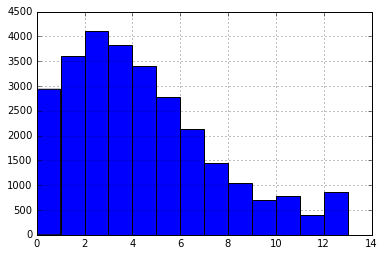

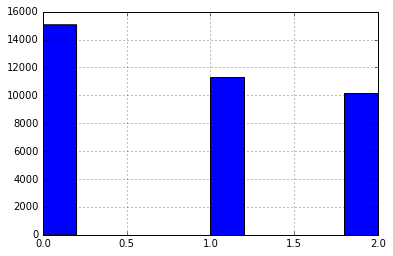

In [27]:

income = BES3[euRefcols].apply(lambda x: x.cat.codes).profile_gross_personal
income[(income>=0 )& (income <14)].hist(bins=range(0,14))

# N= 28030

print( income[(income>=0 )& (income <14)].quantile([0, .33, .66, 1]) )

income[ ~( (income>=0 )& (income <14) )] = np.nan
def set_income_tertile(inc):
    if inc<0 or inc > 13:
        raise Exception("income out of 0-13 range")
    if inc>=5:
        return 2 # High Income
    elif inc>=2:
        return 1 # Medium Income
    else:
        return 0 # Low Income
plt.figure()
income = income.apply(set_income_tertile)
income.hist()

In [28]:
eu_by_dp_inc = pd.DataFrame(data=pd.concat( [euRefVote,death_penalty,income],axis=1) ,copy=True  )   #,columns=["euRefVote","death_penalty"])
eu_by_dp_inc.columns =["euRefVote","death_penalty","personal gross income"]


In [43]:
eu_by_dp_inc[WhiteBritish].groupby(['personal gross income','death_penalty'])["euRefVote"].mean()

personal gross income  death_penalty
0                      0.0              0.167254
                       1.0              0.314991
                       2.0              0.551920
                       3.0              0.640823
                       4.0              0.796490
1                      0.0              0.150868
                       1.0              0.301734
                       2.0              0.493243
                       3.0              0.601732
                       4.0              0.756934
2                      0.0              0.105559
                       1.0              0.265458
                       2.0              0.406190
                       3.0              0.509564
                       4.0              0.685889
Name: euRefVote, dtype: float64

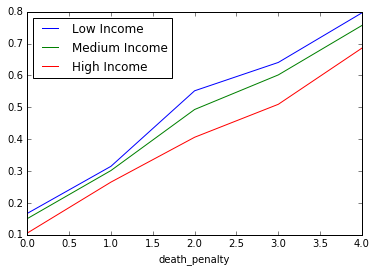

In [142]:
temp = eu_by_dp_inc[WhiteBritish].groupby( ["personal gross income","death_penalty"] ).mean()
income_labels = ["Low Income", "Medium Income", "High Income"]
for income in range(0,3):
    temp["euRefVote"][income].plot(label=income_labels[income])
plt.legend(loc='best')   

In [31]:
# length 36,543
# number who gave a clear Leave/Remain answer 23,358

In [32]:
BES.stack().value_counts()

No                                                                                                                        1140558
Don't know                                                                                                                1059203
__NA__                                                                                                                     660972
Agree                                                                                                                      558891
Yes                                                                                                                        514181
1                                                                                                                          321320
5                                                                                                                          290551
Strongly agree                                                                            

In [33]:
BES.dtypes[BES.dtypes=="datetime64[ns]"].index

Index(['respdate', 'starttime', 'endtime', 'respdateW9', 'starttimeW9',
       'endtimeW9'],
      dtype='object')

In [34]:
BES[BES.columns[list(BES.dtypes=="category")]].stack().value_counts()

No                                            1140530
Don't know                                    1059162
Agree                                          558891
Yes                                            514181
5                                              290549
Strongly agree                                 271647
Disagree                                       264865
Neither agree nor disagree                     260570
Strongly dislike                               199084
4                                              185468
2                                              182971
3                                              182759
6                                              178283
7                                              146539
About the same                                 129192
Mainly remain                                  117590
8                                              114630
1                                              110554
Strongly disagree           

In [35]:
BES[BES.columns[BES.dtypes=="category"]]

,country,generalElectionVote,generalElectionVoteW9,partyId,partyIdSqueeze,partyIdEU,partyIdW9,partyIdSqueezeW9,partyIdEUretroW9,countryOfBirth,...,polKnowOsborne,polKnowMay,polKnowBercow,subjectHE,subjectHECurrent,edlevel,profile_turnout_2015,profile_past_vote_2015,lr_scale,al_scale
0,England,United Kingdom Independence Party (UKIP),United Kingdom Independence Party (UKIP),Labour,NaN,Mainly leave,Labour,NaN,Mainly remain,England,...,Chancellor of the Exchequer,Home secretary,Speaker of the House of Commons,I never attended higher education (university ...,NaN,NaN,"Yes, voted",Labour,0.5,8
1,England,Conservative,Conservative,Conservative,NaN,Fairly evenly split,Conservative,NaN,Fairly evenly split,England,...,Chancellor of the Exchequer,Home secretary,Speaker of the House of Commons,Law,NaN,Undergraduate,"Yes, voted",Conservative,7.5,6
2,Scotland,Other,NaN,Scottish National Party (SNP),NaN,Fairly evenly split,NaN,NaN,NaN,Scotland,...,Chancellor of the Exchequer,Home secretary,Speaker of the House of Commons,NaN,NaN,GCSE A*-C,"Yes, voted",Scottish National Party (SNP),0.5,Authoritarian
3,Wales,Labour,Plaid Cymru,No - none,Labour,Mainly remain,Labour,NaN,Mainly remain,Wales,...,Chancellor of the Exchequer,Home secretary,Speaker of the House of Commons,Economics or business,NaN,Undergraduate,"Yes, voted",Labour,3,3.5
4,England,Conservative,NaN,Conservative,NaN,Fairly evenly split,NaN,NaN,NaN,England,...,Chancellor of the Exchequer,Home secretary,Speaker of the House of Commons,Other,NaN,Undergraduate,"Yes, voted",Conservative,5,Authoritarian
5,England,Conservative,Conservative,Conservative,NaN,Mainly leave,Conservative,NaN,Fairly evenly split,England,...,Chancellor of the Exchequer,Home secretary,Speaker of the House of Commons,"Engineering, Mathematics or Natural sciences",NaN,Undergraduate,"Yes, voted",Conservative,6,6
6,England,Conservative,NaN,Conservative,NaN,Fairly evenly split,NaN,NaN,NaN,England,...,Chancellor of the Exchequer,Home secretary,Speaker of the House of Commons,"Engineering, Mathematics or Natural sciences",NaN,Undergraduate,"Yes, voted",Conservative,7.5,9
7,Scotland,Scottish National Party (SNP),Scottish National Party (SNP),No - none,Scottish National Party (SNP),Mainly remain,No - none,Scottish National Party (SNP),Mainly remain,Scotland,...,Chancellor of the Exchequer,Home secretary,Speaker of the House of Commons,"Engineering, Mathematics or Natural sciences",NaN,Postgrad,"Yes, voted",Scottish National Party (SNP),Left,1.5
8,England,United Kingdom Independence Party (UKIP),United Kingdom Independence Party (UKIP),No - none,United Kingdom Independence Party (UKIP),Mainly leave,No - none,United Kingdom Independence Party (UKIP),Mainly leave,England,...,Chancellor of the Exchequer,Home secretary,Speaker of the House of Commons,NaN,NaN,GCSE D-G,"Yes, voted",United Kingdom Independence Party (UKIP),Left,NaN
9,Wales,United Kingdom Independence Party (UKIP),United Kingdom Independence Party (UKIP),Conservative,NaN,Mainly remain,Conservative,NaN,Fairly evenly split,Wales,...,Chancellor of the Exchequer,Home secretary,Speaker of the House of Commons,NaN,NaN,A-level,"Yes, voted",United Kingdom Independence Party (UKIP),4,6


In [36]:
BES[BES.columns[BES.dtypes=="category"]].cat.ordered

AttributeError: 'DataFrame' object has no attribute 'cat'

In [ ]:
# I'm a fucking genius
# All category columns changed to their code values
# e.g. Index(['Strongly disagree', 'Disagree', 'Neither agree nor disagree', 'Agree', 'Strongly agree', 'Don't know'],
#      dtype='object')
# becomes [0,1,2,3,4,5,6]
# -1 codes for missing value

BES[BES.columns[BES.dtypes=="category"]] = BES[BES.columns[BES.dtypes=="category"]].apply(lambda x: x.cat.codes)
#df.applymap(lambda x: '%.2f' % x)

In [ ]:
BES.dtypes.value_counts()

In [ ]:
features = list(BES.columns[(BES.dtypes=="int8") | (BES.dtypes=="int16") | (BES.dtypes=="float64") ])

In [ ]:
corrmat = BES[features].corr()

In [ ]:
corrmat["euRefVote"].sort_values()

In [ ]:
BES.dtypes.value_counts()


In [ ]:
BES[1:5][BES.columns[1:20]]

In [ ]:
BES["riskScale"]

In [ ]:
BES.euRefVote.value_counts()


In [ ]:
list(BES.columns)

In [ ]:
BES.al2

In [ ]:
death_by_EU = BES[["euRefVote","al2"]]

In [ ]:
death_by_EU.plot(kind='line')

In [ ]:
death_by_EU.al2[death_by_EU.al2=="Strongly agree"]=5
death_by_EU.al2[death_by_EU.al2=="Agree"]=4
death_by_EU.al2[death_by_EU.al2=="Neither agree nor disagree"]=3
death_by_EU.al2[death_by_EU.al2=="Disagree"]=2
death_by_EU.al2[death_by_EU.al2=="Strongly disagree"]=1
death_by_EU.al2[death_by_EU.al2=="Don't know"]=0

In [ ]:
BES.al2[death_by_EU.al2=="Strongly agree"] = 5
#df.loc[df['A'] > 2, 'B'] = new_val

In [ ]:
BES.al2.value_counts()

In [ ]:
def score_to_numeric(x):
    if x=='Strongly agree':
        return 5
    if x=='Agree':
        return 4
    if x=='Neither agree nor disagree':
        return 3
    if x=='Disagree':
        return 2
    if x=='Strongly disagree':
        return 1
    if x=="Don't know":
        return 0


In [ ]:



BES.al2.apply(score_to_numeric).hist(by=BES.euRefVote,bins=6)

In [ ]:
BES.al2